In [117]:
import pandas as pd
import numpy as np
import seaborn as sns

In [118]:
train_df = pd.read_csv("https://gitlab.com/Peskyji/datasciencework/-/raw/master/titanic/train.csv")
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
def fill_age(x):
    survived, sex, age, pclass, embarked = x
    if pd.isnull(age):
        if embarked == 'C':
            if pclass == 1:
                if sex == 'female':
                    if survived == 0:
                        return 50
                    else:
                        return 35
                else:
                    if survived == 0:
                        return 43.05
                    else:
                        return 36.43
                    
            elif pclass == 2:
                if sex == 'female':
                    if survived == 1:
                        return 19.14
                else:
                    if survived == 0:
                        return 29.50
                    else:
                        return 1
                    
            else:
                if sex == 'female':
                    if survived == 0:
                        return 20.70
                    else:
                        return 11.07
                else:
                    if survived == 0:
                        return 27.55
                    else:
                        return 18.48
                    
        if embarked == 'Q':

            if pclass == 1:
                if sex == 'female':
                    if survived == 1:
                        return 44.33
                else:
                    if survived == 0:
                        return 44

            elif pclass == 2:
                if sex == 'female':
                    if survived == 1:
                        return 30
                else:
                    if survived == 0:
                        return 57

            else:
                if sex == 'female':
                    if survived == 0:
                        return 28.10
                    else:
                        return 17.60
                else:
                    if survived == 0:
                        return 28.07
                    else:
                        return 29

        if embarked == 'S':

            if pclass == 1:
                if sex == 'female':
                    if survived == 0:
                        return 13.5
                    else:
                        return 33.61
                else:
                    if survived == 0:
                        return 45.36
                    else:
                        return 36.12

            elif pclass == 2:
                if sex == 'female':
                    if survived == 1:
                        return 36
                    else:
                        return 29.09
                else:
                    if survived == 0:
                        return 33.41
                    else:
                        return 17.09

            else:
                if sex == 'female':
                    if survived == 0:
                        return 23.68
                    else:
                        return 22.54
                else:
                    if survived == 0:
                        return 27.16
                    else:
                        return 22.93
    return age
                

train_df.Age = train_df[['Survived','Sex','Age','Pclass','Embarked']].apply(fill_age, axis=1)        

In [121]:
train_df.loc[61,'Embarked'] = 'Q'
train_df.loc[829,'Embarked'] = 'Q'

In [122]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [123]:
train_df['Relatives'] = train_df['Parch'] + train_df['SibSp']
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [124]:
# train_df[['Sex','Survived','Ticket']].groupby(['Sex','Survived']).Ticket.get_group(('female',0)).unique()

In [125]:
# train_df[['Sex','Survived','Ticket']].groupby(['Sex','Survived']).Ticket.get_group(('male',0)).unique()

In [126]:
# train_df[['Sex','Survived','Ticket']].groupby(['Sex','Survived']).Ticket.get_group(('female',1)).unique()

In [127]:
# train_df[['Sex','Survived','Ticket']].groupby(['Sex','Survived']).Ticket.get_group(('male',1)).unique()

In [128]:
train_df.drop(columns=['Cabin','PassengerId','Ticket','Parch','SibSp','Name'], inplace=True)
train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


In [129]:
sns.set(rc={'figure.figsize':(11,7)})

In [130]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

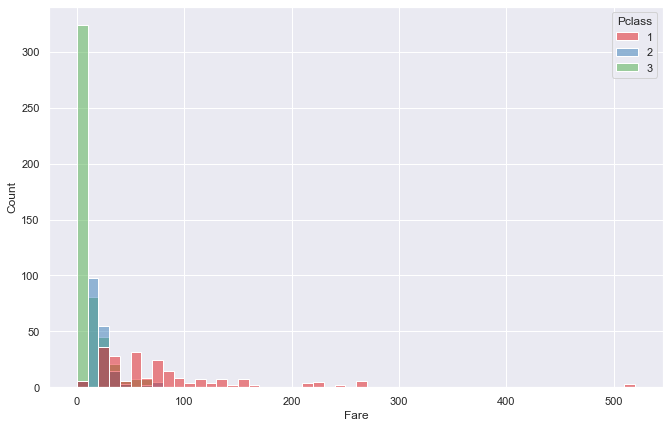

In [131]:
sns.histplot(data=train_df, x='Fare',hue='Pclass',binwidth=10, palette='Set1')

In [132]:
Sex = pd.get_dummies(train_df.Sex, drop_first=True)
Embarked = pd.get_dummies(train_df.Embarked, drop_first=True)

In [133]:
X = pd.concat([train_df[['Pclass','Age','Fare','Relatives']], Sex, Embarked], axis=1)
X.head(2)

,Pclass,Age,Fare,Relatives,male,Q,S
0,3,22.0,7.2500,1,1,0,1
1,1,38.0,71.2833,1,0,0,0


In [134]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
temp_df = StandardScaler().fit_transform(X[['Age','Fare','Pclass','Relatives']])
temp_df2 = MinMaxScaler().fit_transform(X)
temp_df2.shape

(891, 7)

In [135]:
# X = pd.concat([X[['male','Q','S']], pd.DataFrame(temp_df2, columns=['Age','Fare','Pclass','Relatives'])], axis=1)
# X.head(2)
X = temp_df2

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

xtrn,xtest,ytrn,ytest = train_test_split(X,train_df.Survived,test_size=0.2,random_state=89)
model = SVC().fit(xtrn,ytrn)
model2 = LogisticRegression().fit(xtrn,ytrn)
print(classification_report(ytest,model.predict(xtest)))
print(classification_report(ytest,model2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       113
           1       0.91      0.62      0.74        66

    accuracy                           0.84       179
   macro avg       0.86      0.79      0.81       179
weighted avg       0.85      0.84      0.83       179

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.84      0.71      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [83]:
train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


In [84]:
def Fare_category(x):
    ans = 'high'
    if x <=10:
        ans = 'low'
    elif x>10 and x<=30:
        ans = 'mid'
    return ans

train_df['Fare'] = train_df['Fare'].apply(Fare_category)

In [85]:
Fare = pd.get_dummies(train_df.Fare, drop_first=True)

In [86]:
X = pd.concat([train_df[['Pclass','Age','Relatives']], Fare, Sex, Embarked], axis=1)
X.head(2)

,Pclass,Age,Relatives,low,mid,male,Q,S
0,3,22.0,1,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0


<AxesSubplot:>

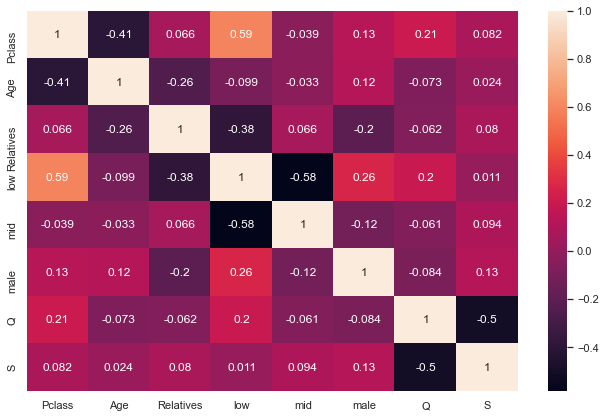

In [88]:
sns.heatmap(X.corr(), annot=True)

In [90]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X.shape

(891, 8)

In [91]:
xtrn,xtest,ytrn,ytest = train_test_split(X,train_df.Survived,test_size=0.2,random_state=42)
model = SVC().fit(xtrn,ytrn)
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



In [92]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression().fit(xtrn,ytrn)
print(classification_report(ytest,model2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [ ]:
confusion_matrix()